In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-04T01:21:33.855398+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
teeplot: 1.4.2
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": 8,
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Alpha+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 3.266334533691406e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.12370181083679199}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.005995750427246094}
!!! {"init_...": 0.0005812644958496094}
!!! {"ete3Tree": 0.5464401245117188}
!!! {"GenomeTree_hierarchical": 0.002273082733154297}
!!! {"mutateBranchETEhierarchy": 0.09307026863098145}
!!! {"write_genome_short": 0.04621458053588867}


  4%|▍         | 8/193 [00:01<00:22,  8.08it/s]

!!! {"writeGenomeNoIndels": 0.17026185989379883}
!!! {"pl.DataFrame": 0.04464864730834961}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.9147236347198486}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.020856142044067383}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0034072399139404297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001323223114013672}
!!! {"init_...": 0.0004820823669433594}
!!! {"ete3Tree": 7.486343383789062e-05}
!!! {"GenomeTree_hierarchical": 0.002061605453491211}
!!! {"mutateBranchETEhierarchy": 1.4066696166992188e-05}
!!! {"write_genome_short": 0.0004956722259

  7%|▋         | 14/193 [00:01<00:12, 14.70it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=103, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003501415252685547}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010442733764648438}
!!! {"init_...": 0.00044608116149902344}
!!! {"ete3Tree": 0.0007698535919189453}
!!! {"GenomeTree_hierarchical": 0.0020279884338378906}
!!! {"mutateBranchETEhierarchy": 0.00013518333435058594}
!!! {"write_genome_short": 0.00013637542724609375}
!!! {"writeGenomeNoIndels": 0.00024175643920898438}
!!! {"pl.DataFrame": 0.00015401840209960938}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005685567855834961}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0

 13%|█▎        | 26/193 [00:01<00:06, 25.22it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008770227432250977}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010800361633300781}
!!! {"init_...": 0.00045013427734375}
!!! {"ete3Tree": 0.01985311508178711}
!!! {"GenomeTree_hierarchical": 0.0019347667694091797}
!!! {"mutateBranchETEhierarchy": 0.007460117340087891}
!!! {"write_genome_short": 0.003587007522583008}
!!! {"writeGenomeNoIndels": 0.012120962142944336}
!!! {"pl.DataFrame": 0.0015752315521240234}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04899168014526367}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009491443634033203}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_a

 17%|█▋        | 33/193 [00:01<00:05, 31.50it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.6226043701171875e-05}
len(phylogeny_df)=60, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003775358200073242}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010347366333007812}
!!! {"init_...": 0.0004296302795410156}
!!! {"ete3Tree": 0.0004374980926513672}
!!! {"GenomeTree_hierarchical": 0.0025184154510498047}
!!! {"mutateBranchETEhierarchy": 8.344650268554688e-05}
!!! {"write_genome_short": 0.00011157989501953125}
!!! {"writeGenomeNoIndels": 0.00015926361083984375}
!!! {"pl.DataFrame": 0.00010347366333007812}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005600929260253906}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00

 24%|██▍       | 46/193 [00:02<00:03, 39.08it/s]

!!! {"write_genome_short": 0.0005574226379394531}
!!! {"writeGenomeNoIndels": 1.0728836059570312e-05}
!!! {"pl.DataFrame": 7.033348083496094e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005017518997192383}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002257823944091797}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=3540, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008545875549316406}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011181831359863281}
!!! {"init_...": 0.0004458427429199219}
!!! {"ete3Tree": 0.021190643310546875}
!!! {"GenomeTree_hierarchical": 0.0020270347595214844}
!!! {"mutateBranchETEhierarchy": 0.005

 31%|███       | 60/193 [00:02<00:02, 49.10it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.7418136596679688e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003504037857055664}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000110626220703125}
!!! {"init_...": 0.0004487037658691406}
!!! {"ete3Tree": 6.246566772460938e-05}
!!! {"GenomeTree_hierarchical": 0.002127408981323242}
!!! {"mutateBranchETEhierarchy": 1.1205673217773438e-05}
!!! {"write_genome_short": 6.818771362304688e-05}
!!! {"writeGenomeNoIndels": 5.9604644775390625e-06}
!!! {"pl.DataFrame": 8.344650268554688e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0045931339263916016}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000194

 38%|███▊      | 73/193 [00:02<00:02, 54.55it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0035295486450195312}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011420249938964844}
!!! {"init_...": 0.00041794776916503906}
!!! {"ete3Tree": 8.082389831542969e-05}
!!! {"GenomeTree_hierarchical": 0.002135753631591797}
!!! {"mutateBranchETEhierarchy": 1.0251998901367188e-05}
!!! {"write_genome_short": 6.747245788574219e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 7.462501525878906e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004572868347167969}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019550323486328125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_

 41%|████      | 79/193 [00:03<00:04, 27.21it/s]

!!! {"mutateBranchETEhierarchy": 0.3616960048675537}
!!! {"write_genome_short": 0.001425027847290039}
!!! {"writeGenomeNoIndels": 0.0029296875}
!!! {"pl.DataFrame": 0.0006854534149169922}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.3789224624633789}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006091594696044922}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=683, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0043179988861083984}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001342296600341797}
!!! {"init_...": 0.00048089027404785156}
!!! {"ete3Tree": 0.003964662551879883}
!!! {"GenomeTree_hierarchical": 0.0020804405212402344

 47%|████▋     | 90/193 [00:03<00:03, 29.97it/s]

!!! {"phastSimRun": 0.00011086463928222656}
!!! {"init_...": 0.0005421638488769531}
!!! {"ete3Tree": 0.00010657310485839844}
!!! {"GenomeTree_hierarchical": 0.0026171207427978516}
!!! {"mutateBranchETEhierarchy": 1.0728836059570312e-05}
!!! {"write_genome_short": 8.0108642578125e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 9.5367431640625e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005580425262451172}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00021219253540039062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=11, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003192424774169922}
enter log_context_duration for _

 53%|█████▎    | 102/193 [00:03<00:02, 36.84it/s]

!!! {"phastSimRun": 0.00011420249938964844}
!!! {"init_...": 0.0005810260772705078}
!!! {"ete3Tree": 7.2479248046875e-05}
!!! {"GenomeTree_hierarchical": 0.0021893978118896484}
!!! {"mutateBranchETEhierarchy": 1.2874603271484375e-05}
!!! {"write_genome_short": 6.914138793945312e-05}
!!! {"writeGenomeNoIndels": 9.775161743164062e-06}
!!! {"pl.DataFrame": 8.821487426757812e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0056760311126708984}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017976760864257812}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 3.3855438232421875e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031807422637939453}
enter log_context_duration for 

 59%|█████▉    | 114/193 [00:03<00:01, 45.20it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.0742416381835938e-05}
len(phylogeny_df)=4, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0036940574645996094}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013065338134765625}
!!! {"init_...": 0.0004723072052001953}
!!! {"ete3Tree": 8.606910705566406e-05}
!!! {"GenomeTree_hierarchical": 0.002750873565673828}
!!! {"mutateBranchETEhierarchy": 1.6927719116210938e-05}
!!! {"write_genome_short": 9.822845458984375e-05}
!!! {"writeGenomeNoIndels": 1.4543533325195312e-05}
!!! {"pl.DataFrame": 0.00018453598022460938}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0055730342864990234}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00

 62%|██████▏   | 120/193 [00:03<00:01, 47.85it/s]

!!! {"phastSimRun": 0.00011110305786132812}
!!! {"init_...": 0.0005512237548828125}
!!! {"ete3Tree": 6.437301635742188e-05}
!!! {"GenomeTree_hierarchical": 0.0021140575408935547}
!!! {"mutateBranchETEhierarchy": 1.0967254638671875e-05}
!!! {"write_genome_short": 6.842613220214844e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 7.82012939453125e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005081653594970703}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001957416534423828}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=540, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0040149688720703125}
enter log_context_duration for 

 69%|██████▉   | 133/193 [00:04<00:01, 52.53it/s]

!!! {"phastSimRun": 0.00012302398681640625}
!!! {"init_...": 0.0005614757537841797}
!!! {"ete3Tree": 9.322166442871094e-05}
!!! {"GenomeTree_hierarchical": 0.0021250247955322266}
!!! {"mutateBranchETEhierarchy": 1.0728836059570312e-05}
!!! {"write_genome_short": 6.818771362304688e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 7.605552673339844e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005170583724975586}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019598007202148438}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003127574920654297}
enter log_context_duration for _

 73%|███████▎  | 140/193 [00:04<00:00, 55.29it/s]

!!! {"phastSimRun": 0.00010919570922851562}
!!! {"init_...": 0.0005390644073486328}
!!! {"ete3Tree": 6.0558319091796875e-05}
!!! {"GenomeTree_hierarchical": 0.0022132396697998047}
!!! {"mutateBranchETEhierarchy": 1.0967254638671875e-05}
!!! {"write_genome_short": 7.033348083496094e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 7.414817810058594e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005193948745727539}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001857280731201172}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003220796585083008}
enter log_context_duration for _

 79%|███████▉  | 153/193 [00:04<00:00, 44.73it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.00961446762084961}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014257431030273438}
!!! {"init_...": 0.0005106925964355469}
!!! {"ete3Tree": 0.024522781372070312}
!!! {"GenomeTree_hierarchical": 0.0020656585693359375}
!!! {"mutateBranchETEhierarchy": 0.0057239532470703125}
!!! {"write_genome_short": 0.003175497055053711}
!!! {"writeGenomeNoIndels": 0.00961446762084961}
!!! {"pl.DataFrame": 0.0019307136535644531}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04955434799194336}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.001136779

 82%|████████▏ | 158/193 [00:04<00:00, 43.45it/s]

!!! {"GenomeTree_hierarchical": 0.002335071563720703}
!!! {"mutateBranchETEhierarchy": 0.003301382064819336}
!!! {"write_genome_short": 0.0025529861450195312}
!!! {"writeGenomeNoIndels": 0.0057370662689208984}
!!! {"pl.DataFrame": 0.0011301040649414062}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.03138375282287598}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0007655620574951172}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032110214233398438}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00016260147094726562}
!!! {"init_...": 0.0004620552062988281}
!!! {"ete3Tree": 7.27176666

 84%|████████▍ | 163/193 [00:05<00:02, 12.39it/s]

!!! {"GenomeTree_hierarchical": 0.376995325088501}
!!! {"mutateBranchETEhierarchy": 0.04474210739135742}
!!! {"write_genome_short": 0.021731853485107422}
!!! {"writeGenomeNoIndels": 0.07245802879333496}
!!! {"pl.DataFrame": 0.015147686004638672}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.7110757827758789}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.006062746047973633}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032088756561279297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000152587890625}
!!! {"init_...": 0.00046515464782714844}
!!! {"ete3Tree": 8.535385131835938e-05}
!

 87%|████████▋ | 167/193 [00:06<00:01, 14.64it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.1696090698242188e-05}
len(phylogeny_df)=625, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0044252872467041016}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010561943054199219}
!!! {"init_...": 0.0004124641418457031}
!!! {"ete3Tree": 0.003621816635131836}
!!! {"GenomeTree_hierarchical": 0.002730131149291992}
!!! {"mutateBranchETEhierarchy": 0.0009059906005859375}
!!! {"write_genome_short": 0.0005311965942382812}
!!! {"writeGenomeNoIndels": 0.0014791488647460938}
!!! {"pl.DataFrame": 0.0003457069396972656}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.011636495590209961}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00038

 92%|█████████▏| 178/193 [00:06<00:00, 21.66it/s]

!!! {"ete3Tree": 0.06525444984436035}
!!! {"GenomeTree_hierarchical": 0.0020966529846191406}
!!! {"mutateBranchETEhierarchy": 0.01533055305480957}
!!! {"write_genome_short": 0.007570505142211914}
!!! {"writeGenomeNoIndels": 0.025382518768310547}
!!! {"pl.DataFrame": 0.004832029342651367}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.1231222152709961}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.002349376678466797}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003222942352294922}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013756752014160156}
!!! {"init_...": 0.0004856586456298

 95%|█████████▍| 183/193 [00:06<00:00, 25.51it/s]

!!! {"ete3Tree": 0.009925365447998047}
!!! {"GenomeTree_hierarchical": 0.0020067691802978516}
!!! {"mutateBranchETEhierarchy": 0.0022478103637695312}
!!! {"write_genome_short": 0.002012968063354492}
!!! {"writeGenomeNoIndels": 0.0036602020263671875}
!!! {"pl.DataFrame": 0.0007576942443847656}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.022727251052856445}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005288124084472656}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031070709228515625}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011086463928222656}
!!! {"init_...": 0.0004446

100%|██████████| 193/193 [00:06<00:00, 28.64it/s]

!!! {"phastSimRun": 0.00014090538024902344}
!!! {"init_...": 0.0006151199340820312}
!!! {"ete3Tree": 8.177757263183594e-05}
!!! {"GenomeTree_hierarchical": 0.0021567344665527344}
!!! {"mutateBranchETEhierarchy": 1.1920928955078125e-05}
!!! {"write_genome_short": 7.033348083496094e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 9.036064147949219e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0054895877838134766}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00024008750915527344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=25, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033473968505859375}
enter log_context_duration fo

exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.2611570358276367}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.032242536544799805}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0025222301483154297}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03340864181518555}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.011582612991333008}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002454519271850586}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.1457672119140625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.032865285873413086}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002652406692504883}
enter log_context_duration for seq_a

 43%|████▎     | 3/7 [00:00<00:00, 21.47it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03327751159667969}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003472566604614258}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0024003982543945312}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03336143493652344}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0032739639282226562}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002464771270751953}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches


100%|██████████| 7/7 [00:00<00:00, 23.39it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.033104896545410156}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0024275779724121094}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0025892257690429688}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03345441818237305}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003519296646118164}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0014526844024658203}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mism

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.2504706382751465}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 35
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': 8,
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 36
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exit log_context_duration for alifestd_mark_clade_subtended_duration_ratio_sister_asexual
!!! {"alifestd_mark_clade_subtended_duration_ratio_sister_asexual": 0.19659066200256348}
enter log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual



100%|██████████| 3751/3751 [00:25<00:00, 147.13it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 27.24894404411316}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 3751/3751 [00:04<00:00, 918.19it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 121.38707518577576}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.06931900978088379}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 181.90410232543945}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.008785486221313477}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003266334533691406}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0004012584686279297}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0003921985626220703}
ancestral_


100%|██████████| 368/368 [00:00<00:00, 307348.44it/s]

process mutations:   0%|          | 1/368 [00:00<01:14,  4.95it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:14<11:21,  1.89s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   16.5s



process mutations:  13%|█▎        | 48/368 [00:52<05:40,  1.07s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   53.1s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   57.7s



process mutations:  24%|██▍       | 88/368 [01:31<04:41,  1.01s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.6min



process mutations:  35%|███▍      | 128/368 [02:11<04:01,  1.01s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.3min



process mutations:  46%|████▌     | 168/368 [02:49<03:17,  1.01it/s]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.0min



process mutations:  57%|█████▋    | 208/368 [03:28<02:36,  1.02it/s]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  3.7min



process mutations:  67%|██████▋   | 248/368 [04:08<01:58,  1.01it/s]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  4.4min



process mutations:  78%|███████▊  | 288/368 [04:48<01:19,  1.01it/s]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  5.0min



process mutations:  89%|████████▉ | 328/368 [05:27<00:39,  1.01it/s]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  5.7min



process mutations: 100%|██████████| 368/368 [06:09<00:00,  1.00s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  6.2min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  6.3min finished


process replicate: 100%|██████████| 1/1 [09:23<00:00, 563.37s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.07907533645629883}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 109
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> '52cfdb0a-29eb-8372-bdb3-8b6257877e5d', '52cfdb0a-29eb-8372-bdb3-8b6257877e5d', '52cfdb0a-29eb-8372-bdb3-8b6257
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ phylo_df_background_len        <u16> 7287, 7388, 7286, 7388, 6272
$ phyo_df_screened_len           <u16> 215, 114, 216, 114, 1230
$ tb_stat                        <cat> clade duration ratio, clade duration ratio, 

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


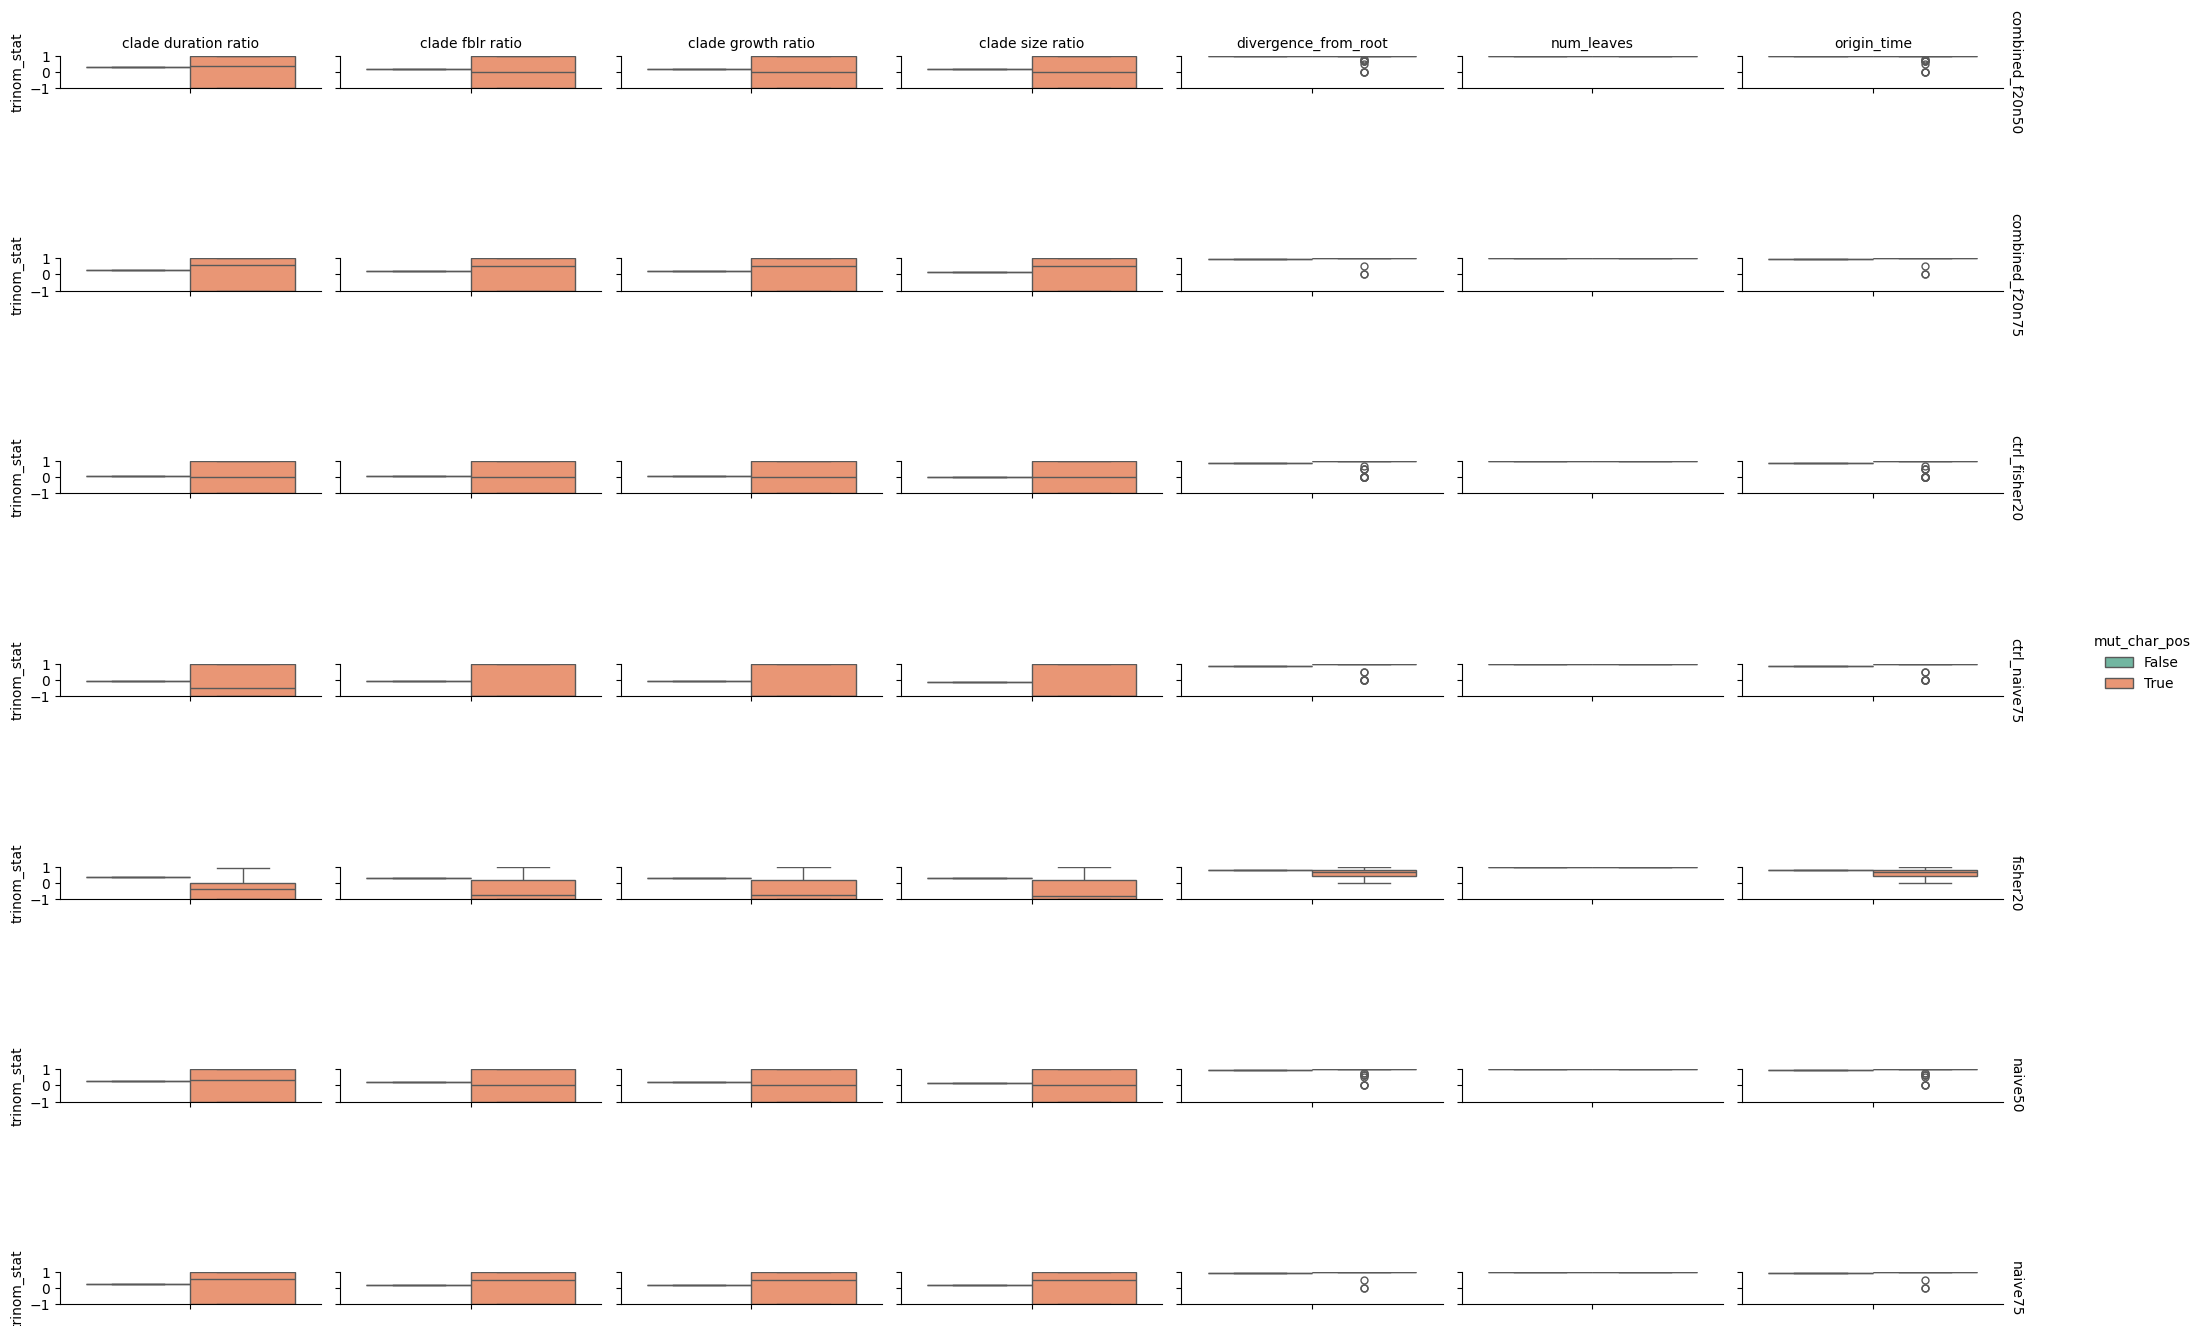

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


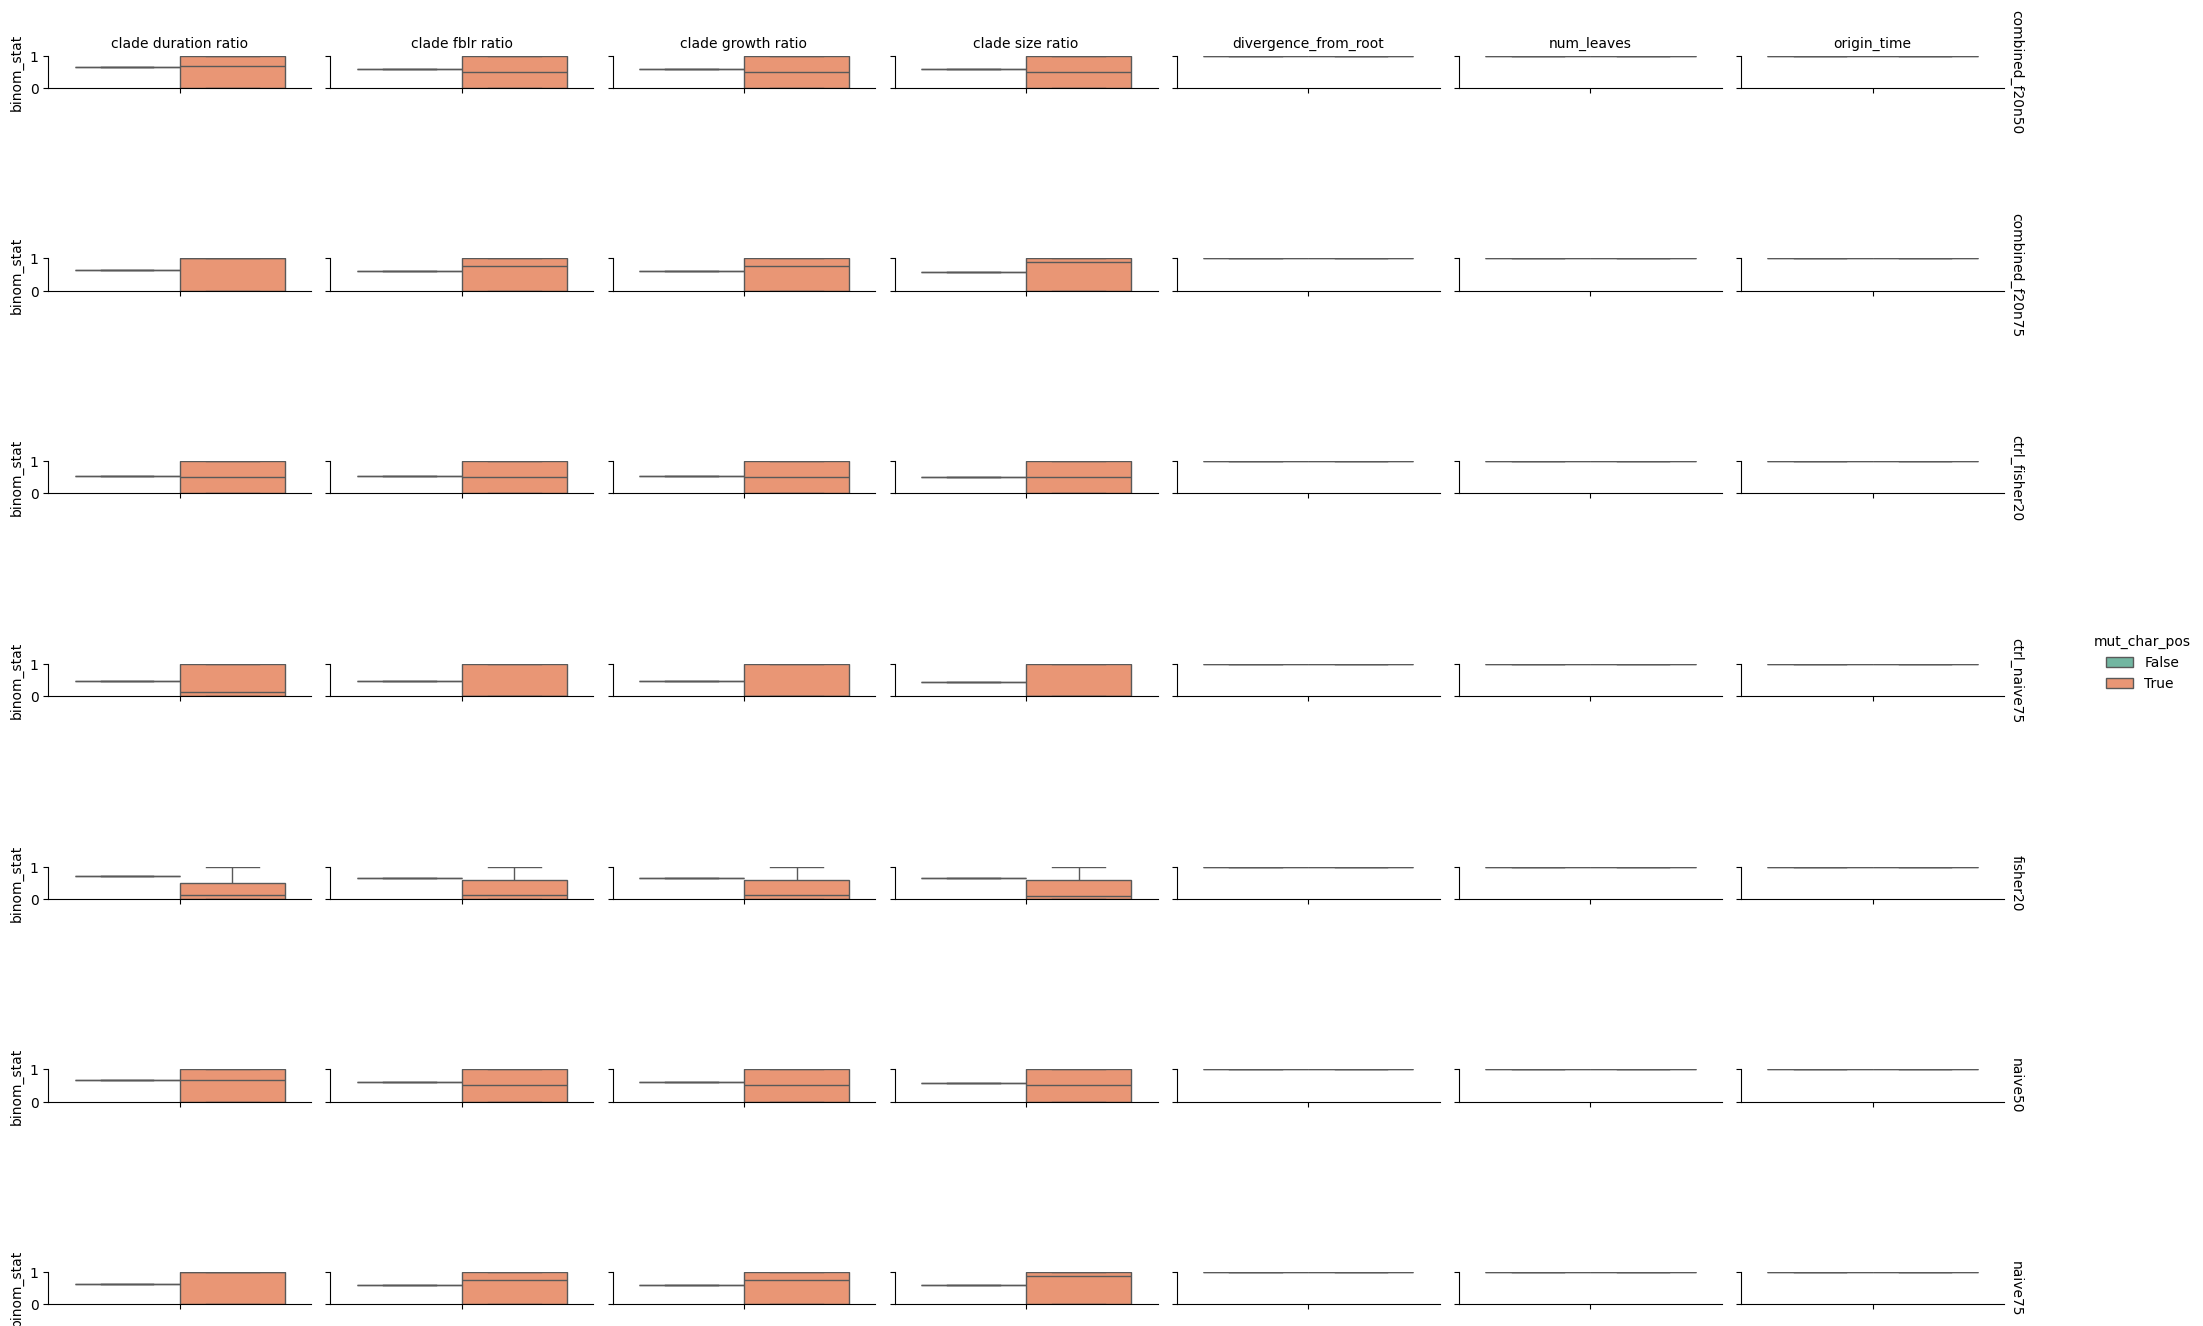

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


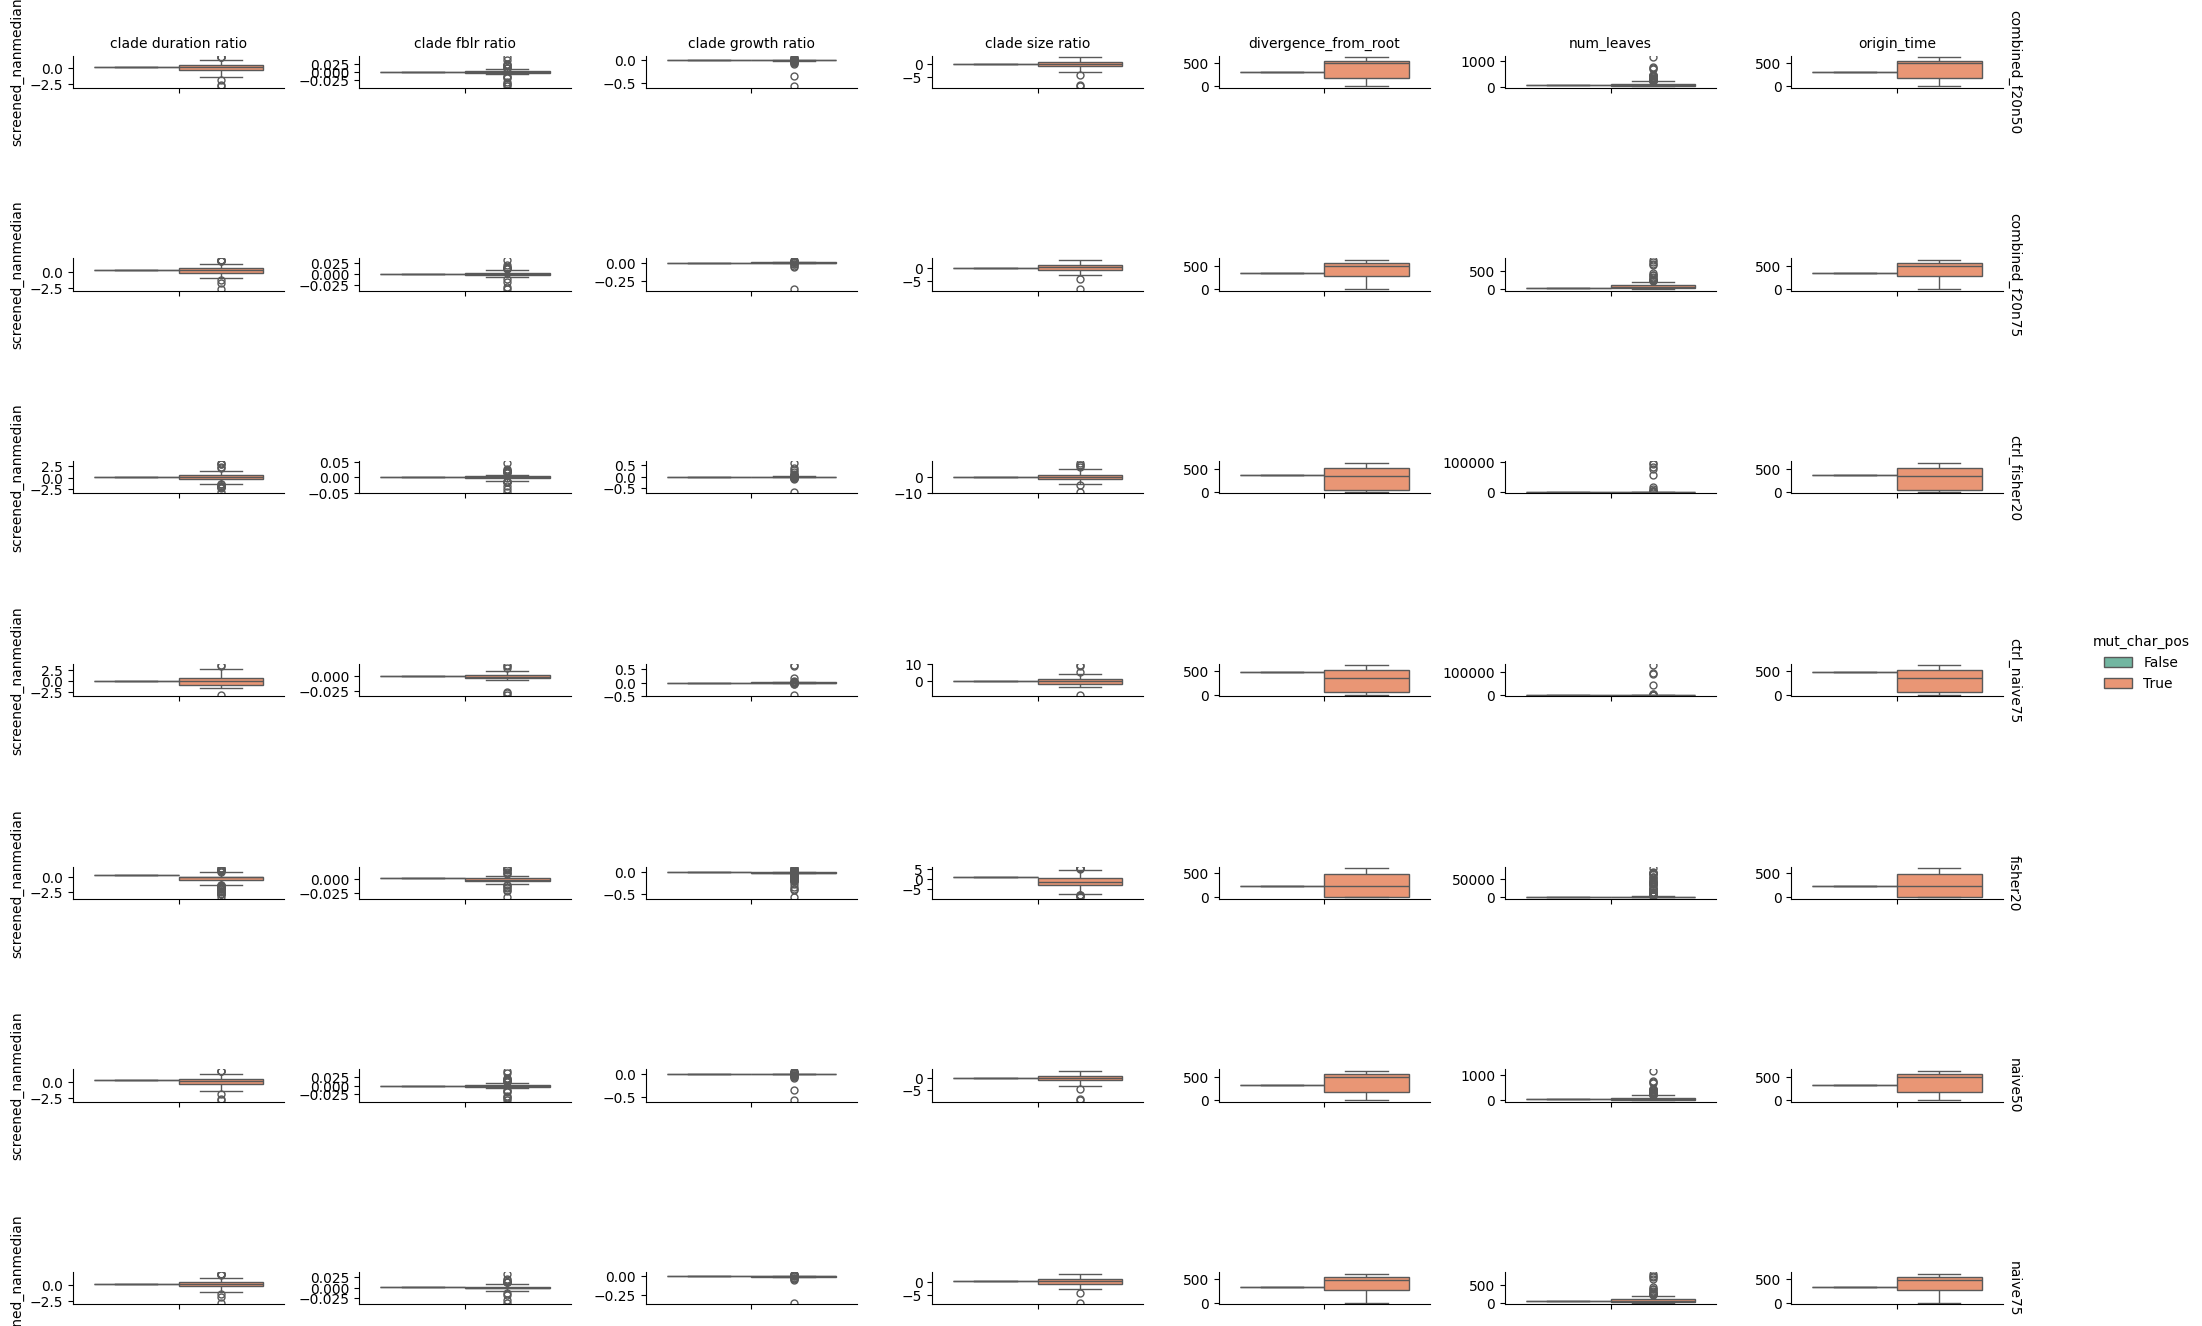

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


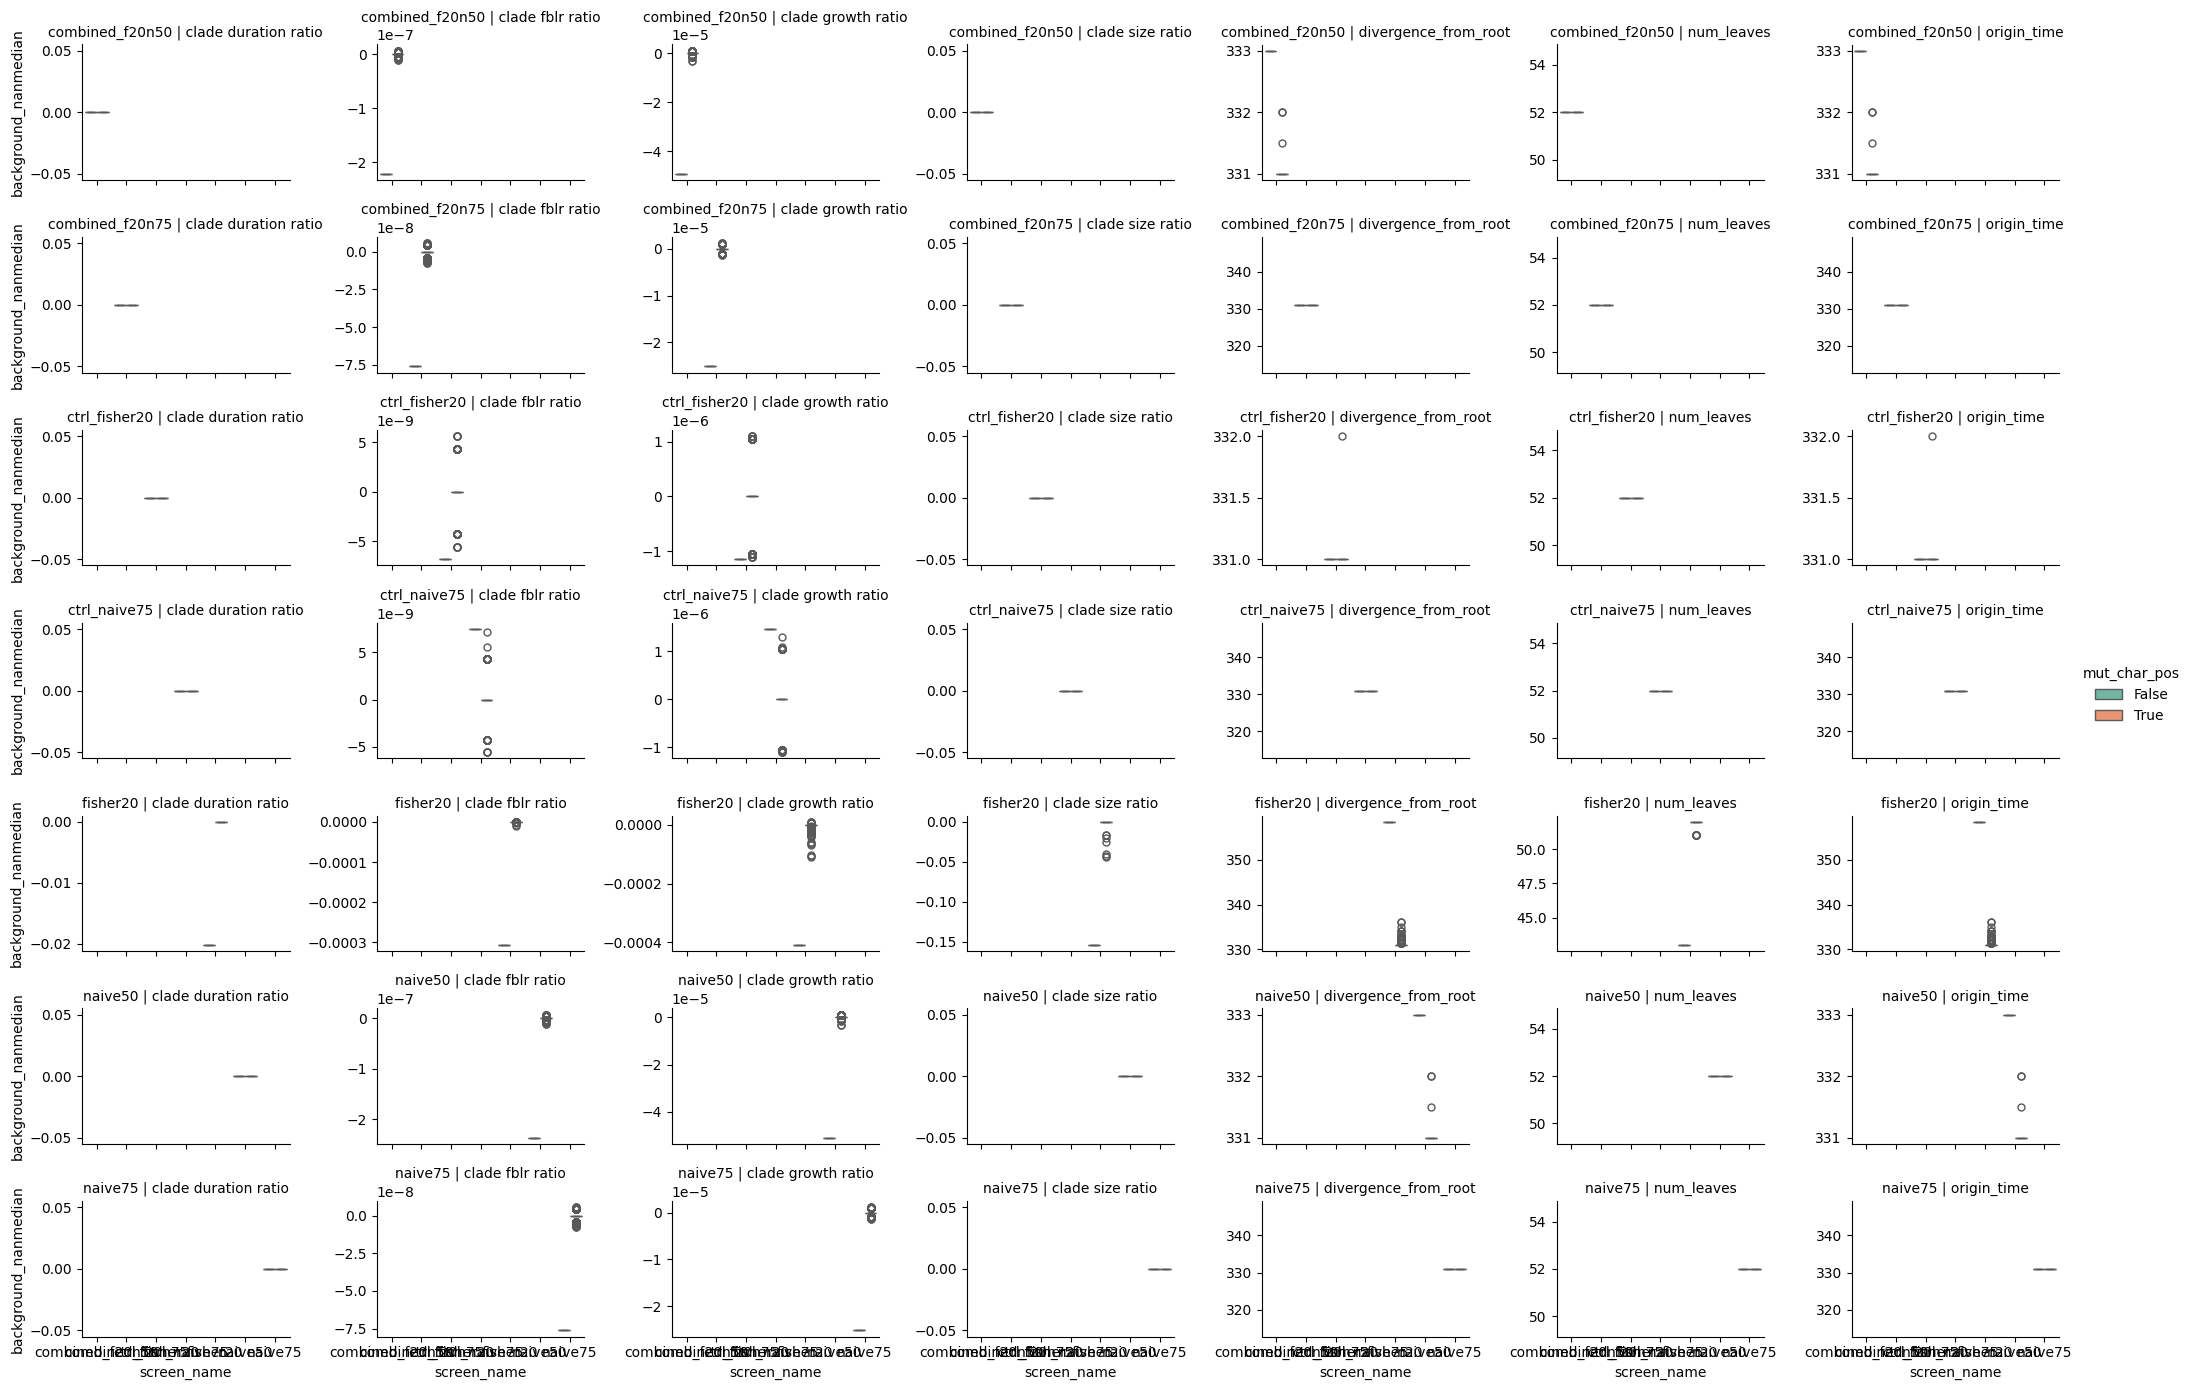

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
